In [1]:
# Importing libraries
# Importing data handling libraries

import pandas as pd
import numpy as np
from collections import OrderedDict

# Importing data visulization library
import matplotlib.pyplot as plt
import seaborn as sns

# Importing statistics library
import scipy.stats as scipystats

# Miscelleneous library
import warnings
warnings.filterwarnings('ignore')

# importing preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# train_test_split
from sklearn.model_selection import train_test_split

# Accuracy library
from sklearn.metrics import mean_squared_error,r2_score

# Model building libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# cross validation library
from sklearn.model_selection import cross_val_score

# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv("Data.csv")
df2=df.copy()

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [5]:
df.shape

(1030, 9)

In [6]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
def custom_summary(df):
    result=[]
    for i in list(df.columns):
        stats=OrderedDict({'Feature_name':i,
                          'Datatype':df[i].dtype,
                           'Count':df[i].count(),
                           'Min':df[i].min(),
                           'Quartile1':round(df[i].quantile(0.25),3),
                           'Mean':round(df[i].mean(),3),
                           'Median':round(df[i].median(),3),
                           'Quartile3':round(df[i].quantile(0.75),3),
                           'Max':df[i].max(),
                           'Sta dev':round(df[i].std(),2),
                           'Skewness':round(df[i].skew(),2),
                           'kurtosis':round(df[i].kurt(),2),
                           'Range':df[i].max()-df[i].min(),
                           'IQR':round(df[i].quantile(0.75)-df[i].quantile(0.25),3)   
                          }) 
        result.append(stats)
        #skewness comment
        if df[i].skew()<-1:
            sklabel="High -ve skewed"
        elif -1<df[i].skew()<-0.5:
            sklabel="Moderate -ve skew"
        elif -0.5<df[i].skew()<0:
            sklabel="Low -'ve skewed"
        elif 0<df[i].skew()<0.5:
            sklabel="Low +'ve skewed"
        elif 0.5<df[i].skew()<1:
            sklabel="Moderate +ve skew"
        elif df[i].skew()>1:
            sklabel="Highly +ve skewed"
        else:
            sklabel="Error"
        stats["skewness comment"]=sklabel
        #outlier comment
        upper_limit = stats["Quartile3"]+(1.5*stats['IQR'])
        lower_limit = stats["Quartile1"]-(1.5*stats['IQR'])
        if len([x for x in df[i] if x <lower_limit or x>upper_limit])>0:
            outlier_comment="Has outliers"
        else:
            outlier_comment="No outliers"
        stats["outlier comment"]=outlier_comment
        
    result_df=pd.DataFrame(result)
    return result_df
custom_summary(df)

,Feature_name,Datatype,Count,Min,Quartile1,Mean,Median,Quartile3,Max,Sta dev,Skewness,kurtosis,Range,IQR,skewness comment,outlier comment
0,cement,float64,1030,102.00,192.375,281.168,272.900,350.000,540.0,104.51,0.51,-0.52,438.00,157.625,Moderate +ve skew,No outliers
1,slag,float64,1030,0.00,0.000,73.896,22.000,142.950,359.4,86.28,0.80,-0.51,359.40,142.950,Moderate +ve skew,Has outliers
2,ash,float64,1030,0.00,0.000,54.188,0.000,118.300,200.1,64.00,0.54,-1.33,200.10,118.300,Moderate +ve skew,No outliers
3,water,float64,1030,121.80,164.900,181.567,185.000,192.000,247.0,21.35,0.07,0.12,125.20,27.100,Low +'ve skewed,Has outliers
4,superplastic,float64,1030,0.00,0.000,6.205,6.400,10.200,32.2,5.97,0.91,1.41,32.20,10.200,Moderate +ve skew,Has outliers
5,coarseagg,float64,1030,801.00,932.000,972.919,968.000,1029.400,1145.0,77.75,-0.04,-0.60,344.00,97.400,Low -'ve skewed,No outliers
6,fineagg,float64,1030,594.00,730.950,773.580,779.500,824.000,992.6,80.18,-0.25,-0.10,398.60,93.050,Low -'ve skewed,Has outliers
7,age,int64,1030,1.00,7.000,45.662,28.000,56.000,365.0,63.17,3.27,12.17,364.00,49.000,Highly +ve skewed,Has outliers
8,strength,float64,1030,2.33,23.710,35.818,34.445,46.135,82.6,16.71,0.42,-0.31,80.27,22.425,Low +'ve skewed,Has outliers


## Building ODT plots(Outlier Detection Plots)

In [9]:
def replaceoutlier(df,col,method='quartile', strategy='median'):
    col_data=df[col]
    q1,q2,q3=col_data.quantile([0.25,0.5,0.75])
    col_mean,col_std=col_data.mean(),col_data.std()
    
    # setting outlier boundaries using quartile method 
    if method=='quartile':
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        
    # setting outlier boundaries using standard deviation method
    elif method=='std':
        cutoff=col_std*2
        upper_limit=col_mean+cutoff
        lower_limit=col_mean-cutoff
    else:
        print('Error:please select the correct method')
        
    # printing and replacing outlier
    outliers = df.loc[(col_data<lower_limit) | (col_data>upper_limit),col]
    outlier_density=round(len(outliers)/len(df)*100,2)
    
    if len(outliers)==0:
        print(f'Feature {col} does not have any outliers')
    else:
        print('Total no.of outliers are ',len(outliers))
        print('density of outlier is ', outlier_density)
        print(f'outliers for {col} are: \n {np.sort(np.array(outliers))}\n')
        display(df[(col_data<lower_limit) | (col_data>upper_limit)])
    
    #Replacing outlier with mean or median
    if strategy=="median":
        df.loc[(col_data<lower_limit) | (col_data>upper_limit),col]=q2
    elif strategy=="mean":
        df.loc[(col_data<lower_limit) | (col_data>upper_limit),col]=col_mean
    else:
        print('please select correct strategy')
        
    return df

        

In [10]:
def odt_plot(df,col):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
    # Showing Box plots
    ax1.set_title(col + ' box plot')
    ax1.set_xlabel('Box Density')
    ax1.set_ylabel(col +' Values')
    sns.boxplot(df[col],ax=ax1,orient='v',color='red')
    
    
    #plot with outliers
    sns.distplot(df[col],ax=ax2,color='red',fit=scipystats.norm)
    ax2.axvline(df[col].mean(),color='green',linestyle='dashed')
    ax2.axvline(df[col].median(),color='black',linestyle='dashed')
    ax2.set_title(col + ' histogram with outliers')
    ax2.set_xlabel('Density')
    ax2.set_ylabel(col +' Values')
    
    
    y=replaceoutlier(df,col)
    sns.distplot(y[col],ax=ax3,color='red',fit=scipystats.norm)
    ax3.axvline(y[col].mean(),color='green',linestyle='dashed')
    ax3.axvline(y[col].median(),color='black',linestyle='dashed')
    ax3.set_title(col + ' histogram without outliers')
    ax3.set_xlabel('Density')
    ax3.set_ylabel(col +' Values')
    
    plt.show()
    
    

Feature cement does not have any outliers


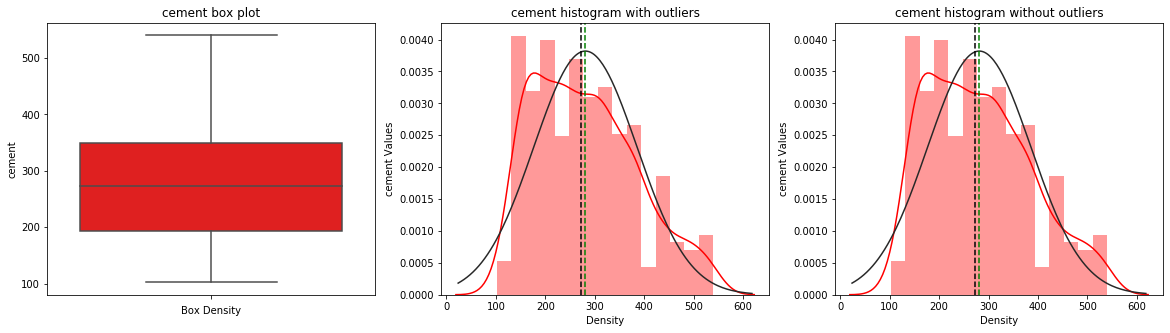

Total no.of outliers are  2
density of outlier is  0.19
outliers for slag are: 
 [359.4 359.4]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


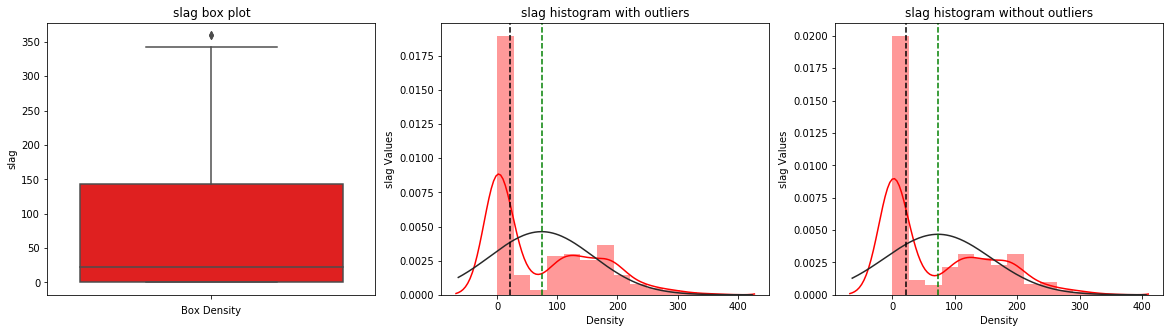

Feature ash does not have any outliers


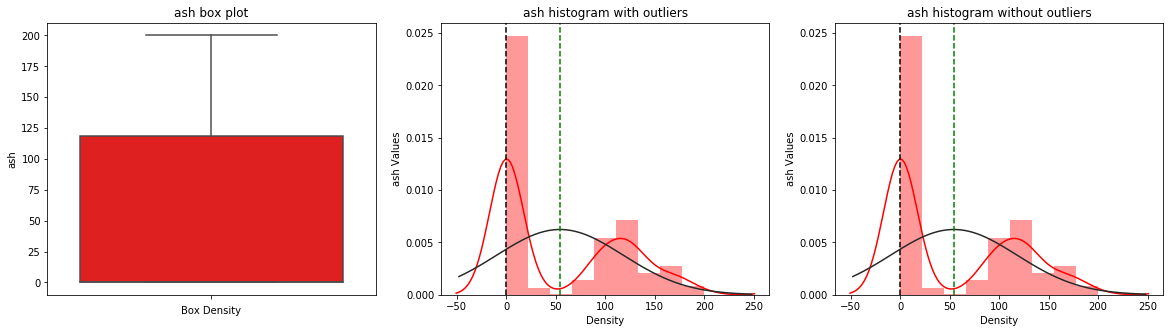

Total no.of outliers are  9
density of outlier is  0.87
outliers for water are: 
 [121.8 121.8 121.8 121.8 121.8 236.7 237.  246.9 247. ]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


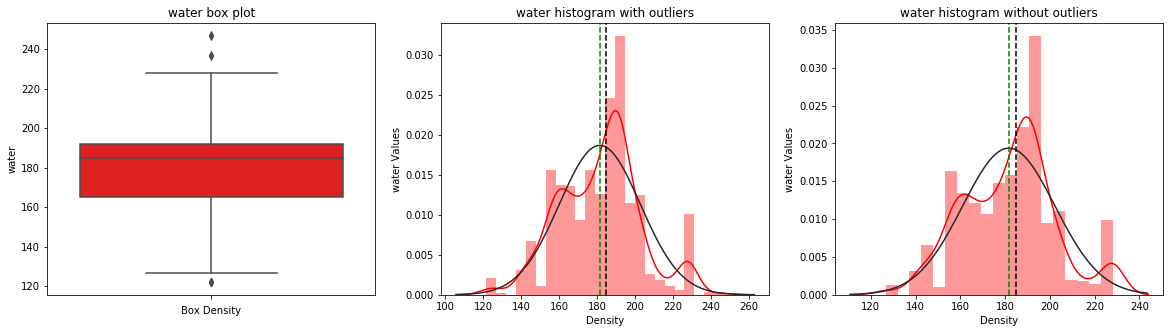

Total no.of outliers are  10
density of outlier is  0.97
outliers for superplastic are: 
 [28.2 28.2 28.2 28.2 28.2 32.2 32.2 32.2 32.2 32.2]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


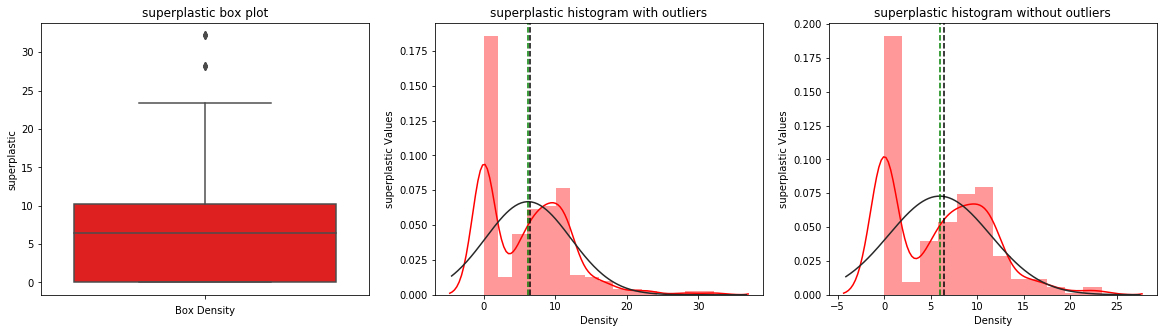

Feature coarseagg does not have any outliers


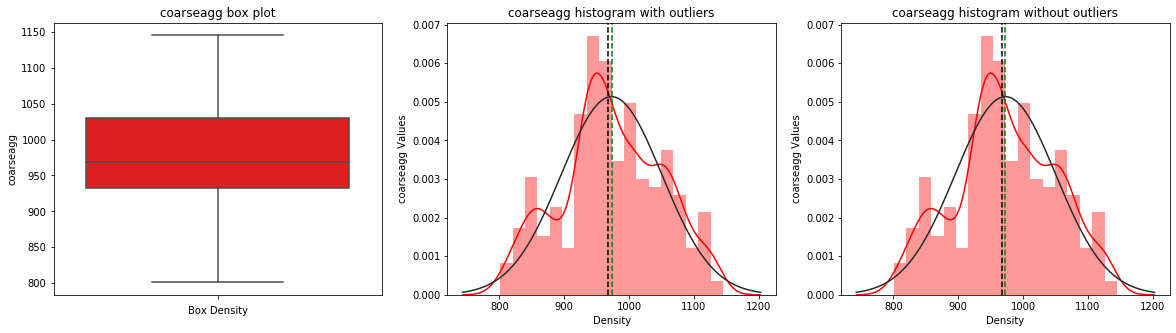

Total no.of outliers are  5
density of outlier is  0.49
outliers for fineagg are: 
 [992.6 992.6 992.6 992.6 992.6]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


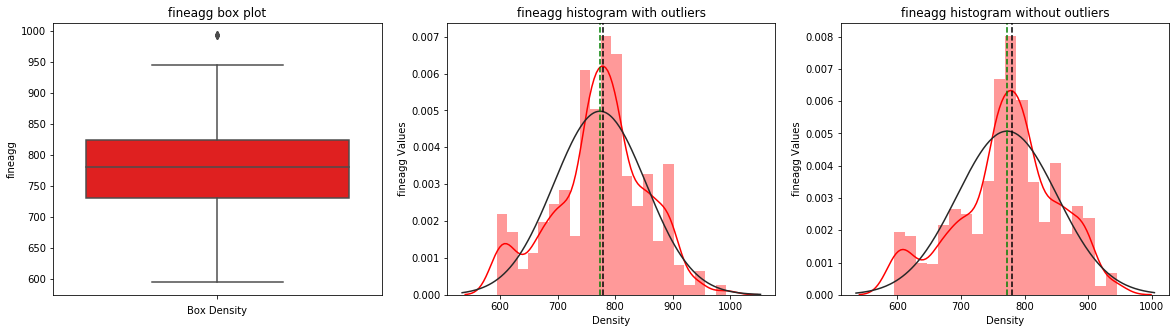

Total no.of outliers are  59
density of outlier is  5.73
outliers for age are: 
 [180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 270 270 270 270 270 270 270 270 270 270
 270 270 270 360 360 360 360 360 360 365 365 365 365 365 365 365 365 365
 365 365 365 365 365]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


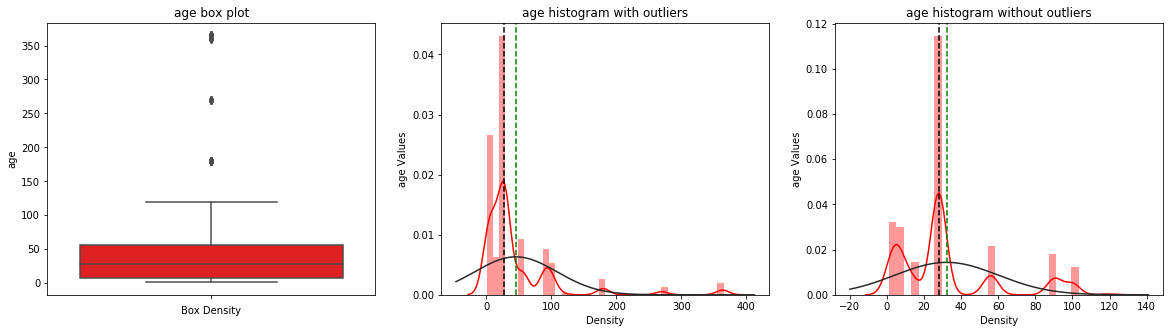

Total no.of outliers are  4
density of outlier is  0.39
outliers for strength are: 
 [79.99 80.2  81.75 82.6 ]



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28.0,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91.0,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56.0,80.20


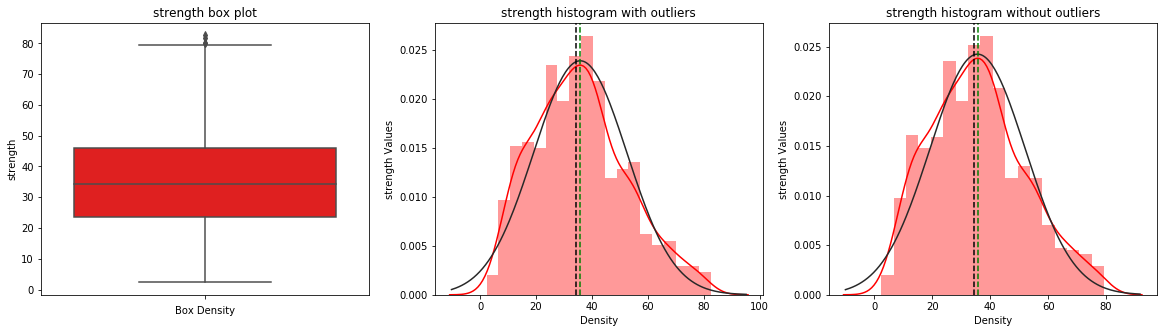

In [11]:
for col in df.columns.to_list():
    odt_plot(df,col)

In [12]:
custom_summary(df)

,Feature_name,Datatype,Count,Min,Quartile1,Mean,Median,Quartile3,Max,Sta dev,Skewness,kurtosis,Range,IQR,skewness comment,outlier comment
0,cement,float64,1030,102.00,192.375,281.168,272.900,350.000,540.0,104.51,0.51,-0.52,438.00,157.625,Moderate +ve skew,No outliers
1,slag,float64,1030,0.00,0.000,73.241,22.000,142.725,342.1,85.38,0.78,-0.62,342.10,142.725,Moderate +ve skew,No outliers
2,ash,float64,1030,0.00,0.000,54.188,0.000,118.300,200.1,64.00,0.54,-1.33,200.10,118.300,Moderate +ve skew,No outliers
3,water,float64,1030,126.60,164.900,181.653,185.000,192.000,228.0,20.60,0.09,-0.04,101.40,27.100,Low +'ve skewed,No outliers
4,superplastic,float64,1030,0.00,0.000,5.974,6.400,10.075,23.4,5.48,0.47,-0.44,23.40,10.075,Low +'ve skewed,No outliers
5,coarseagg,float64,1030,801.00,932.000,972.919,968.000,1029.400,1145.0,77.75,-0.04,-0.60,344.00,97.400,Low -'ve skewed,No outliers
6,fineagg,float64,1030,594.00,730.950,772.546,779.400,822.200,945.0,78.70,-0.33,-0.19,351.00,91.250,Low -'ve skewed,Has outliers
7,age,float64,1030,1.00,7.000,32.256,28.000,28.000,120.0,27.80,1.29,0.79,119.00,21.000,Highly +ve skewed,Has outliers
8,strength,float64,1030,2.33,23.710,35.637,34.422,45.808,79.4,16.46,0.39,-0.36,77.07,22.098,Low +'ve skewed,Has outliers


# Feature Interaction

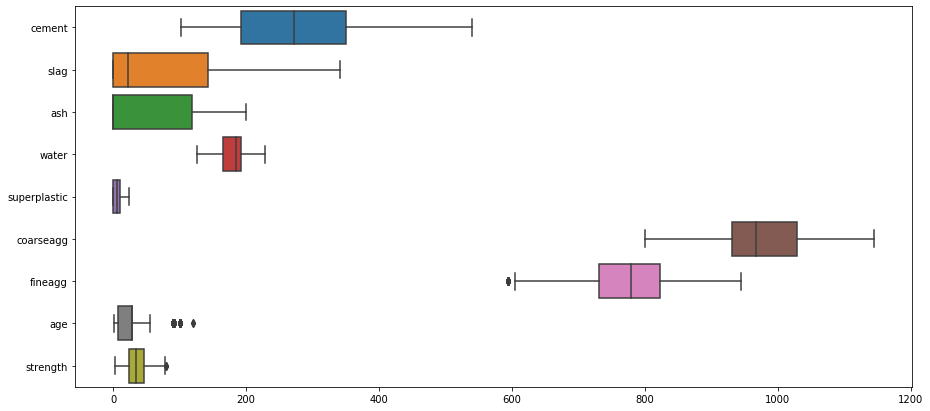

In [13]:
fig=plt.figure(figsize=(15,7))
ax=sns.boxplot(data=df,orient='h')

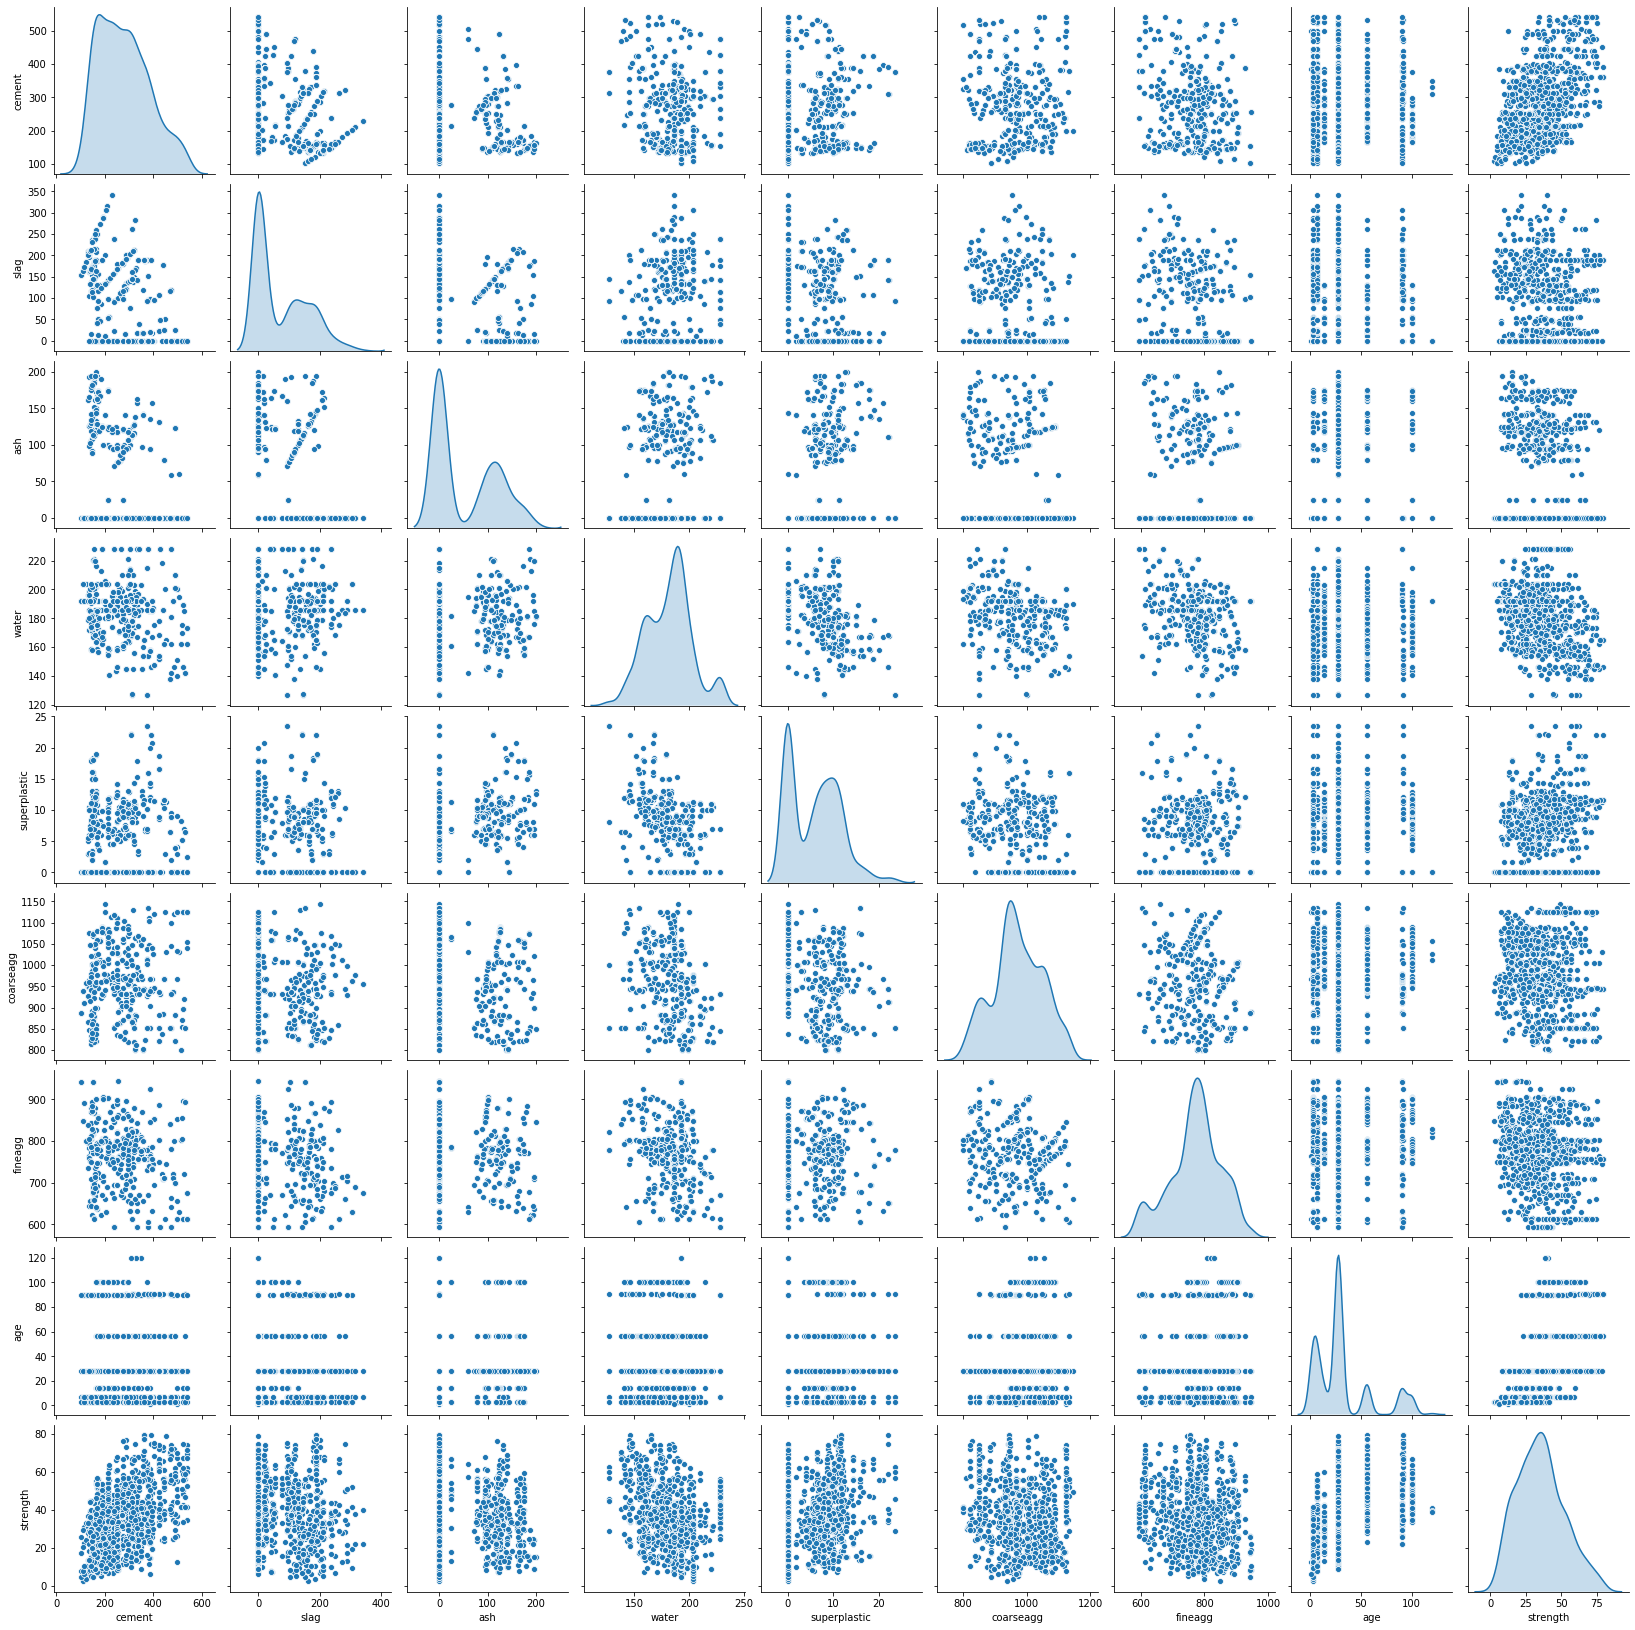

In [14]:
sns.pairplot(df,diag_kind='kde')

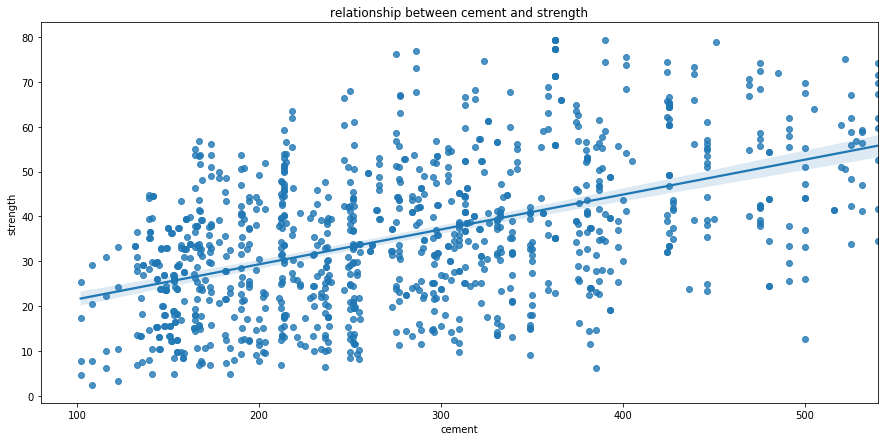

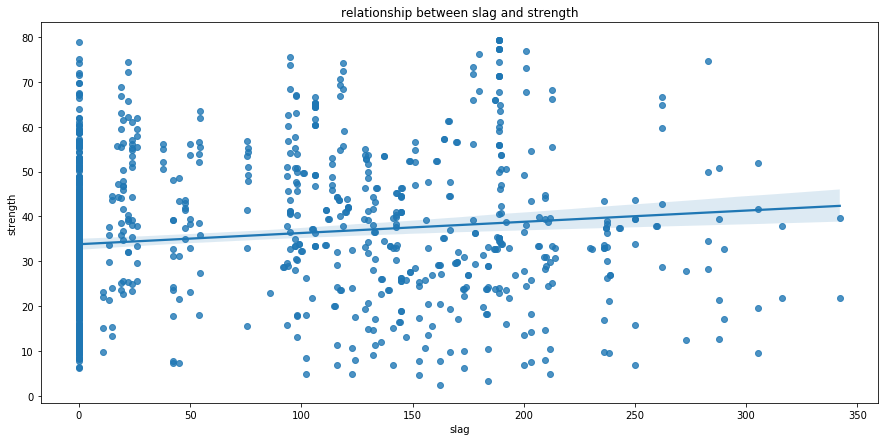

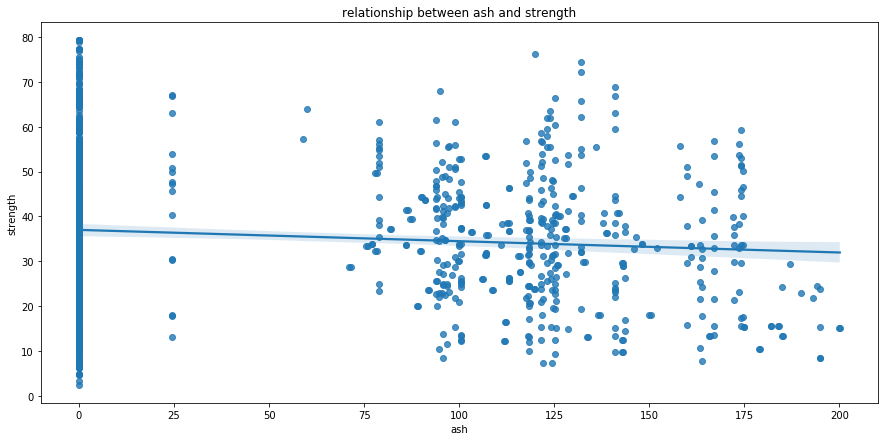

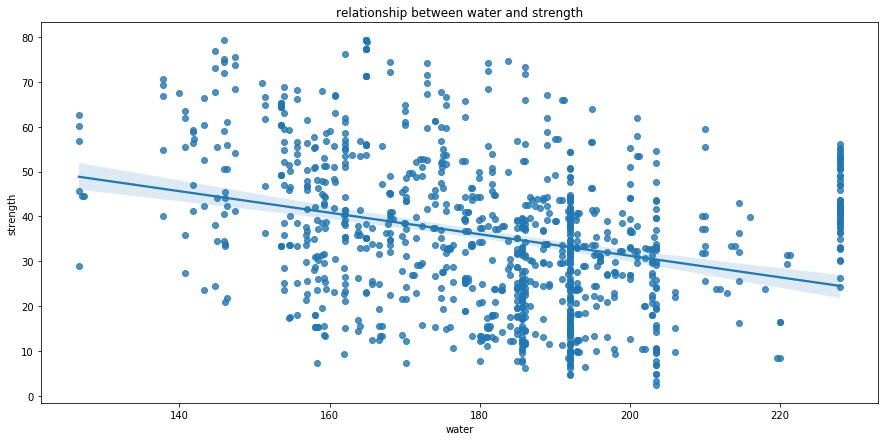

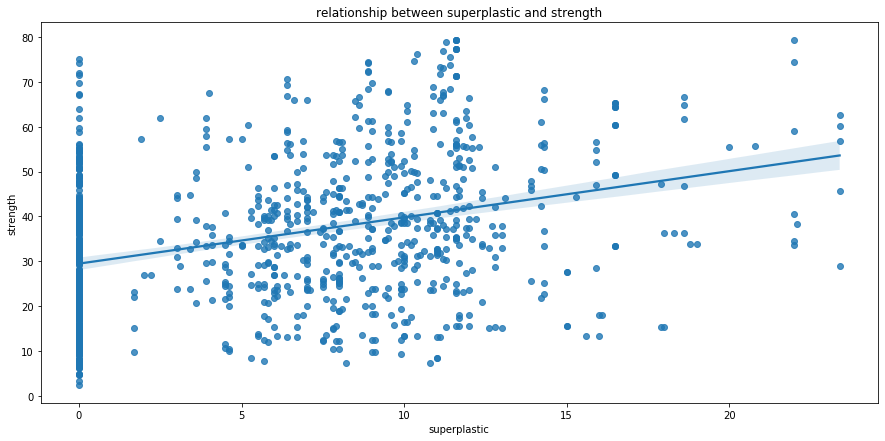

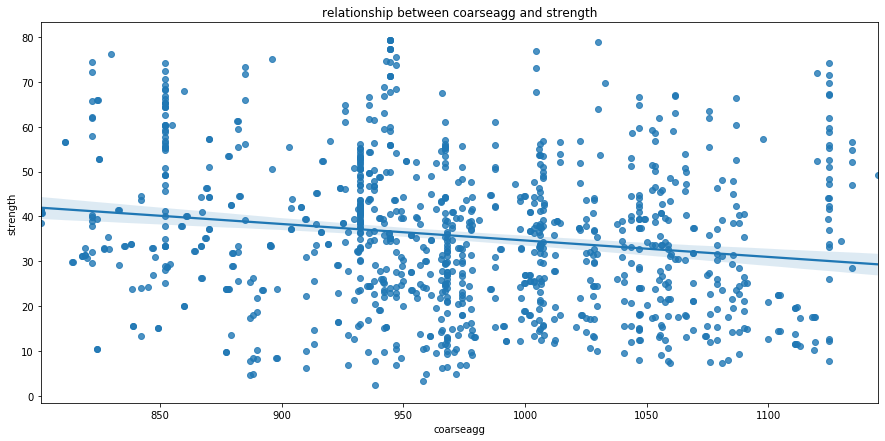

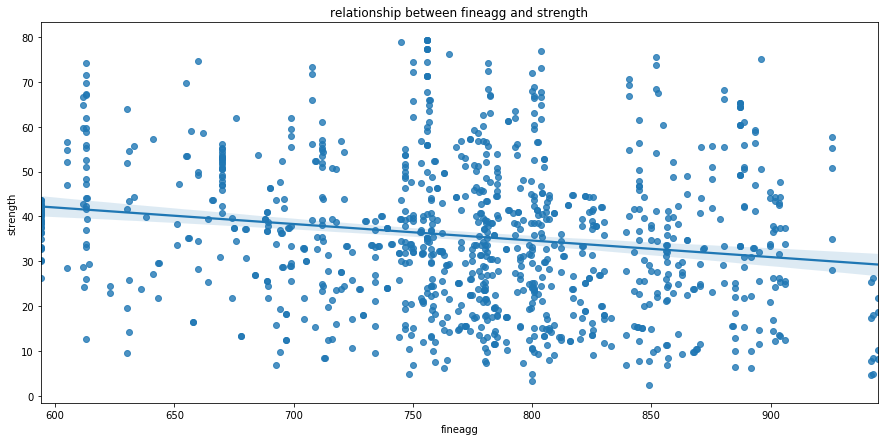

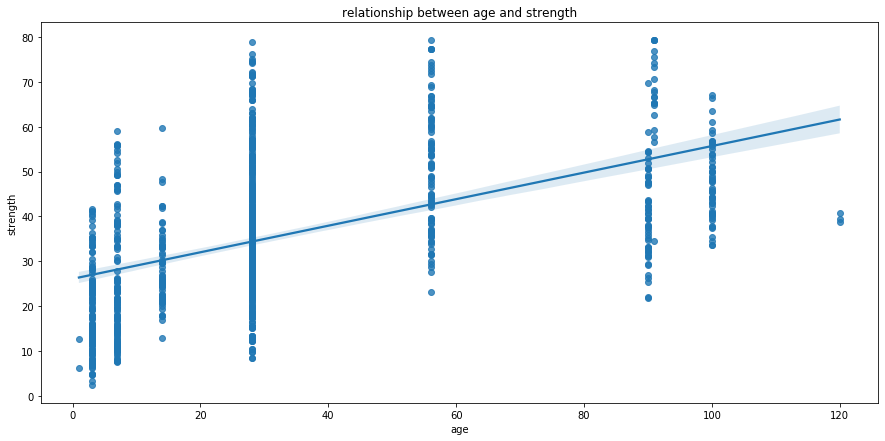

In [15]:
# multivariate analysis
for col in list(df.columns):
    if col != 'strength':
        fig,ax1=plt.subplots(figsize=(15,7),sharex=False)
        sns.regplot(x=df[col],y=df['strength'],ax=ax1).set_title(f'relationship between {col} and strength')

In [16]:
corr_matrix=df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.00,-0.28,-0.40,-0.09,0.01,-0.11,-0.24,-0.03,0.49
slag,-0.28,1.00,-0.32,0.10,0.06,-0.28,-0.28,-0.03,0.13
ash,-0.40,-0.32,1.00,-0.25,0.45,-0.01,0.09,0.06,-0.10
water,-0.09,0.10,-0.25,1.00,-0.66,-0.16,-0.43,-0.04,-0.30
superplastic,0.01,0.06,0.45,-0.66,1.00,-0.22,0.16,0.06,0.34
coarseagg,-0.11,-0.28,-0.01,-0.16,-0.22,1.00,-0.16,0.02,-0.17
fineagg,-0.24,-0.28,0.09,-0.43,0.16,-0.16,1.00,0.05,-0.18
age,-0.03,-0.03,0.06,-0.04,0.06,0.02,0.05,1.00,0.50
strength,0.49,0.13,-0.10,-0.30,0.34,-0.17,-0.18,0.50,1.00


# checking for Multicolinearity
## 1.Correlation matrix
## 2.Varience Inflation Index or Factor


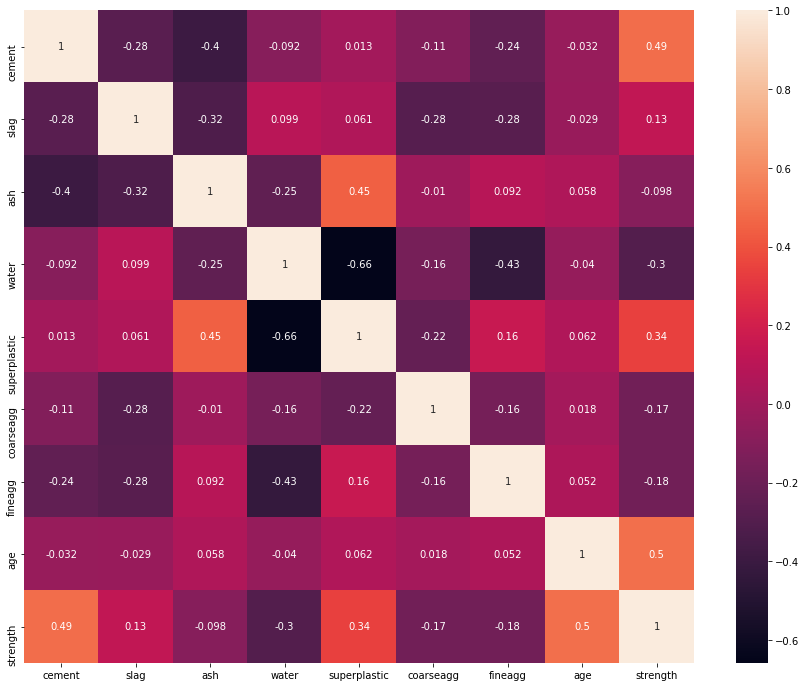

In [17]:
# Correlation matrix
corrmat=df.corr()
fig,ax=plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,annot=True)

In [18]:
# Varience Inflation Factor
# step1:it regresses every independent variable with each other and calculate the R2 value
# step2: The VIF is calculated by the formula: 1/(1-r2)
# if the VIF/VII of the variable is greater than 5 then, the variable is multi-colinear
def vifcolinearity(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif["viffactor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["feature"]=x.columns
    return vif.sort_values(by='viffactor',ascending=False).round(1)

In [19]:
vifcolinearity(df.drop('strength',axis=1))

,viffactor,feature
5,86.9,coarseagg
3,82.0,water
6,68.7,fineagg
0,14.3,cement
4,5.7,superplastic
2,4.4,ash
1,3.3,slag
7,2.4,age


## Performing PCA

In [20]:
def applypca(x):
    n_components=len(x.columns)
    x=StandardScaler().fit_transform(x)
    
    # applying pca
    for j in range(1,n_components):
        pca=PCA(n_components=j)
        pcom=pca.fit_transform(x)
        expvarobj=np.cumsum(pca.explained_variance_ratio_)
        if expvarobj[j-1]>=0.9:
            n_components=j
            break
    print("explained_variance_ratio after PCA is ",expvarobj)

    # creating dataframe for PCA components
    cols=[]
    for i in range(1,n_components+1):
        cols.append("PC"+str(i))
        
    #Changing into DataFrame    
    p_components=pd.DataFrame(data=pcom,columns=cols)

    return p_components

In [21]:
p_comp=applypca(df.drop('strength',axis=1))

explained_variance_ratio after PCA is  [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [22]:
vifcolinearity(p_comp)

,viffactor,feature
0,1.0,PC1
4,1.0,PC5
2,1.0,PC3
5,1.0,PC6
1,1.0,PC2
3,1.0,PC4


In [23]:
# Concatinatig data for model building
y=df[['strength']]
y

,strength
0,29.89
1,23.51
2,29.22
3,45.85
4,18.29
...,...
1025,13.29
1026,41.30
1027,44.28
1028,55.06


In [24]:
def traintestsplit(x,tcol,test_size=0.3):
    return train_test_split(df,tcol,test_size=test_size,random_state=200)

In [25]:
# building the model
def modelbuilding(model_name,model,x,tcol,test_size=0.3):
    x_train,x_test,y_train,y_test=traintestsplit(x,tcol)
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,ypred))
    li=[model_name,r2_score(y_test,ypred),rmse]
    return li

In [26]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()
lso=Lasso()
rid=Ridge()
svm=SVR()

In [27]:
# model building
def fitmodels(p_comp,y,test_size=0.3):
    col_names=['modelname','r2_score','rmse']
    result=pd.DataFrame(columns=col_names)
    result.loc[len(result)]=modelbuilding('linear_regression',lr,p_comp,y)
    result.loc[len(result)]=modelbuilding('lasso_regression',lso,p_comp,y)
    result.loc[len(result)]=modelbuilding('ridge_regression',rid,p_comp,y)
    result.loc[len(result)]=modelbuilding('DecisionTreeRegressor',dt,p_comp,y)
    result.loc[len(result)]=modelbuilding('RandomForestRegressor',rf,p_comp,y)
    result.loc[len(result)]=modelbuilding('KNeighborsRegressor',knn,p_comp,y)
    result.loc[len(result)]=modelbuilding('AdaBoostRegressor',ab,p_comp,y)
    result.loc[len(result)]=modelbuilding('GradientBoostingRegressor',gb,p_comp,y)
    result.loc[len(result)]=modelbuilding('XGBRegressor',xgb,p_comp,y)
    result.loc[len(result)]=modelbuilding('SVR',svm,p_comp,y)
    return result

In [28]:
# getting outputs
finaloutput=fitmodels(p_comp,y)
print(finaloutput)

                   modelname  r2_score          rmse
0          linear_regression  1.000000  1.795263e-14
1           lasso_regression  0.999982  6.844282e-02
2           ridge_regression  1.000000  1.734298e-04
3      DecisionTreeRegressor  0.999743  2.609948e-01
4      RandomForestRegressor  0.999955  1.093852e-01
5        KNeighborsRegressor  0.693410  9.018796e+00
6          AdaBoostRegressor  0.996771  9.256184e-01
7  GradientBoostingRegressor  0.999893  1.687058e-01
8               XGBRegressor  0.999513  3.595447e-01
9                        SVR  0.224811  1.434080e+01


In [29]:
x=df2.drop(columns='strength')
x.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [30]:
finaloutput_2=fitmodels(x,y)
print(finaloutput_2)

                   modelname  r2_score          rmse
0          linear_regression  1.000000  1.795263e-14
1           lasso_regression  0.999982  6.844282e-02
2           ridge_regression  1.000000  1.734298e-04
3      DecisionTreeRegressor  0.999799  2.308751e-01
4      RandomForestRegressor  0.999954  1.104248e-01
5        KNeighborsRegressor  0.693410  9.018796e+00
6          AdaBoostRegressor  0.997252  8.538883e-01
7  GradientBoostingRegressor  0.999893  1.681154e-01
8               XGBRegressor  0.999513  3.595447e-01
9                        SVR  0.224811  1.434080e+01


In [31]:
# performing k-fold cross validation
def kfold_cv(x,y,folds=10):
    lr=LinearRegression()
    dt=DecisionTreeRegressor()
    knn=KNeighborsRegressor()
    rf=RandomForestRegressor()
    ab=AdaBoostRegressor()
    gb=GradientBoostingRegressor()
    xgb=XGBRegressor()
    lso=Lasso()
    rid=Ridge()
    svm=SVR()

    score_lr=cross_val_score(lr,x,y,cv=folds)
    score_dt=cross_val_score(dt,x,y,cv=folds)
    score_knn=cross_val_score(knn,x,y,cv=folds)
    score_rf=cross_val_score(rf,x,y,cv=folds)
    score_ab=cross_val_score(ab,x,y,cv=folds)
    score_gb=cross_val_score(gb,x,y,cv=folds)
    score_xgb=cross_val_score(xgb,x,y,cv=folds)
    score_lso=cross_val_score(lso,x,y,cv=folds)
    score_rid=cross_val_score(rid,x,y,cv=folds)
    score_svm=cross_val_score(svm,x,y,cv=folds)
    
    models=[lr,dt,knn,rf,ab,gb,xgb,lso,rid,svm]
    model_name=["linear_regression","decision_tree","KNN","random forest","ada boost","Gradient boost","Xtreme_gradient boost","Lasso","Ridge","SVM"]
    scores=[score_lr,score_dt,score_knn,score_rf,score_ab,score_gb,score_xgb,score_lso,score_rid,score_svm]
    
    result=[]
    for idx in range(0,len(models)):
        print(model_name[idx])
        score_mean=np.mean(scores[idx])
        score_std=np.std(scores[idx])
        m_name=model_name[idx]
        temp=[m_name,score_mean,score_std]
        result.append(temp)
        
    result_df=pd.DataFrame(result,columns=['Model_Name','Avg_Accuracy','Accuracy_std'])
    return result_df

In [32]:
kfold_cv(p_comp,y)

linear_regression
decision_tree
KNN
random forest
ada boost
Gradient boost
Xtreme_gradient boost
Lasso
Ridge
SVM


,Model_Name,Avg_Accuracy,Accuracy_std
0,linear_regression,0.663928,0.059476
1,decision_tree,0.760020,0.055551
2,KNN,0.767815,0.055746
3,random forest,0.865983,0.031905
4,ada boost,0.728369,0.038368
5,Gradient boost,0.828685,0.050276
6,Xtreme_gradient boost,0.873262,0.036061
7,Lasso,0.649837,0.049887
8,Ridge,0.663935,0.059437
9,SVM,0.703117,0.042765


In [33]:
# performing Hyperparameter tunnin with gridsearch_cv

def gridsearch_cv(model,modelname,x,y,cv=5):
    if modelname =='lasso':
        lso_param = {'alpha':[1e-15,1e-12,1e-10,1e-8,1e-6,1e-4,1e-2,0,1,2,3,4,5,6,7,8,9,10,20,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]}
        model_grid = GridSearchCV(estimator=model,param_grid=lso_param,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
    elif modelname =='ridge':
        rid_param = {'alpha':[1e-15,1e-12,1e-10,1e-8,1e-6,1e-4,1e-2,0,1,2,3,4,5,6,7,8,9,10,20,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]}
        model_grid = GridSearchCV(estimator=model,param_grid=rid_param,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
    elif modelname == 'KNN':
        knn_param = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,170,18,19,20]}
        model_grid = GridSearchCV(estimator=model,param_grid=knn_param,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
    elif modelname =='GB':
        gb_param = {'learning_rate':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10],'alpha':[1e-15,1e-12,1e-10,1e-8,1e-6,1e-4,1e-2,0,1,2,3,4,5,6,7,8,9,10,20,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]}
        model_grid = GridSearchCV(estimator=model,param_grid=gb_param,cv=5,verbose=1,n_jobs=-1)
    elif modelname == 'RF':
        rf_param = {'criterion':['mse','mae'],'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
        model_grid = GridSearchCV(estimator=model,param_grid=rf_param,cv=5,verbose=1,n_jobs=-1)
    model_grid.fit(x,y)
    return model_grid.best_params_

In [34]:
gridsearch_cv(Lasso(),'lasso',p_comp,y)

{'alpha': 0.01}

In [35]:
gridsearch_cv(Ridge(),'ridge',p_comp,y)

{'alpha': 4}

In [36]:
gridsearch_cv(KNeighborsRegressor(),'KNN',p_comp,y)

{'n_neighbors': 3}

In [39]:
gridsearch_cv(GradientBoostingRegressor(),'GB',p_comp,y)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 8400 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:  5.3min finished


{'alpha': 1e-10, 'learning_rate': 0.3, 'max_leaf_nodes': 9}

In [40]:
gridsearch_cv(RandomForestRegressor(),'RF',p_comp,y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  4.2min finished


{'criterion': 'mse', 'max_depth': 24}

In [41]:
# cluster analysis
x=df2.drop('strength',axis=1)
y=df2[['strength']]

In [42]:
from sklearn.cluster import KMeans

In [43]:
labels=KMeans(n_clusters=2,random_state=50).fit_predict(x)

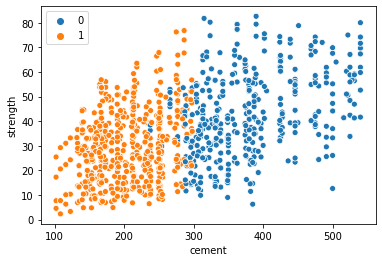

In [44]:
sns.scatterplot(df2.cement,df2.strength,hue=labels)

In [45]:
# plotting cluster between all independent variables
def kmeansplot(x,t_col,labels):
    columns=list(set(list(x.columns))-set([t_col]))
    l=len(columns)
    r=int(len(columns)/2)
    if r%2==0:
        r=r
    else :
        r=r+1
    # plotting empty plots
    
    f,ax=plt.subplots(r,2,figsize=(15,15))
    a=0
    for col in range(0,r):
        for j in range(0,2):
            if a!=l:
                ax[col][j].scatter(x[t_col],x[columns[a]],c=labels)
                ax[col][j].set_xlabel(columns[a])
                ax[col][j].set_ylabel(t_col)
                a=a+1
                

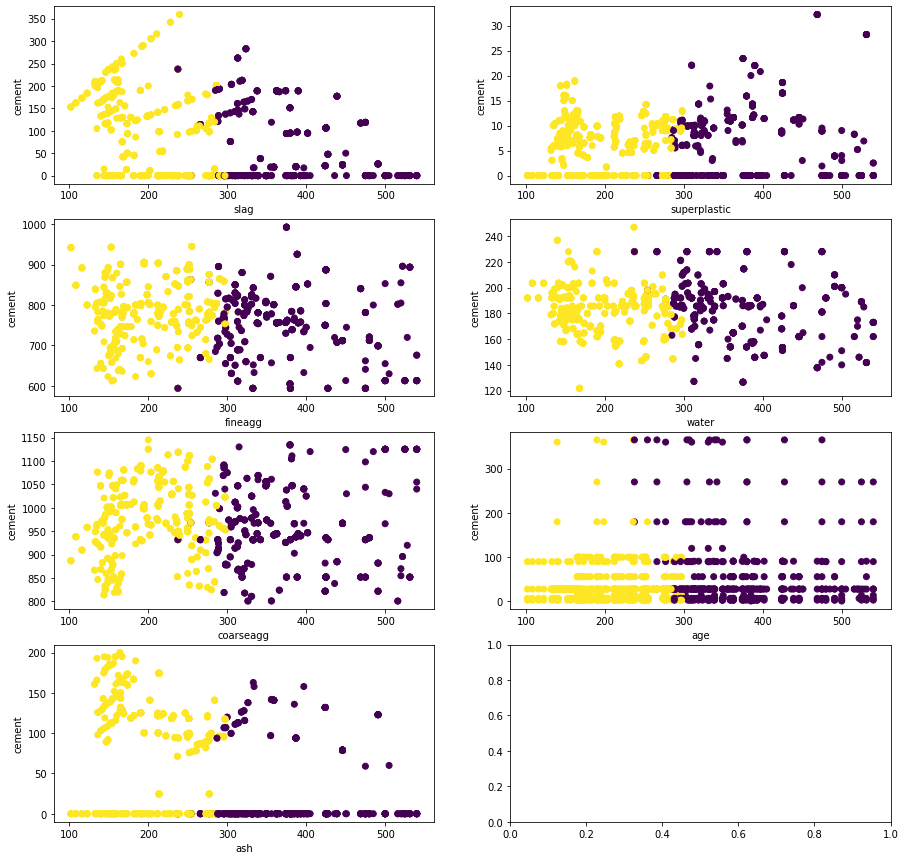

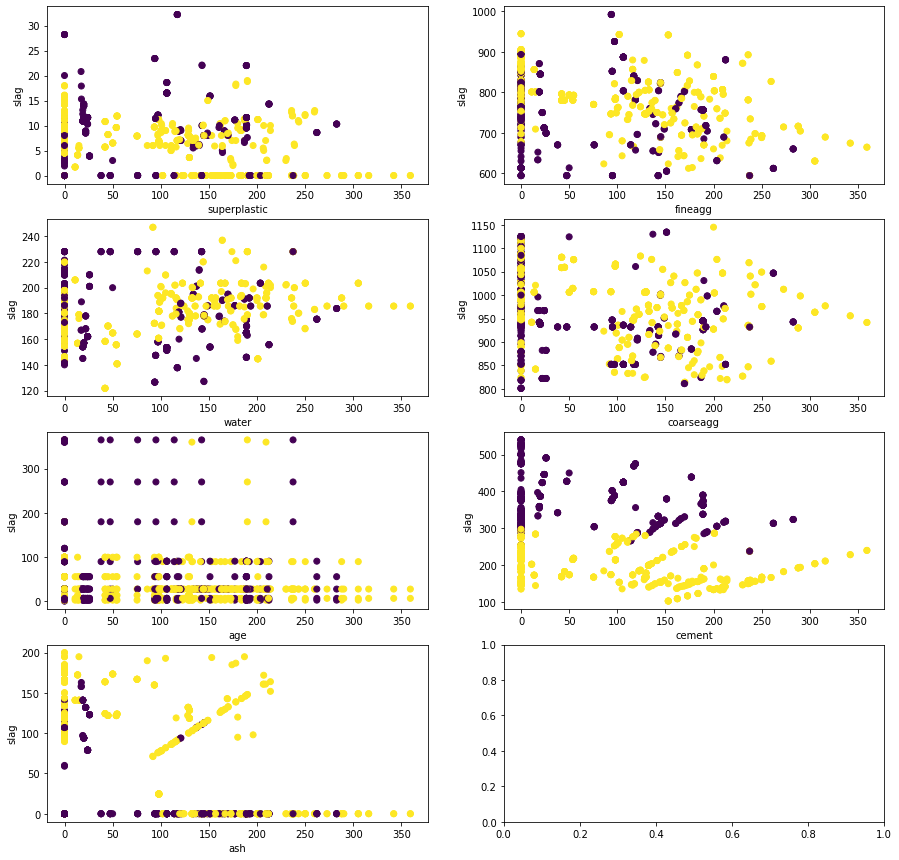

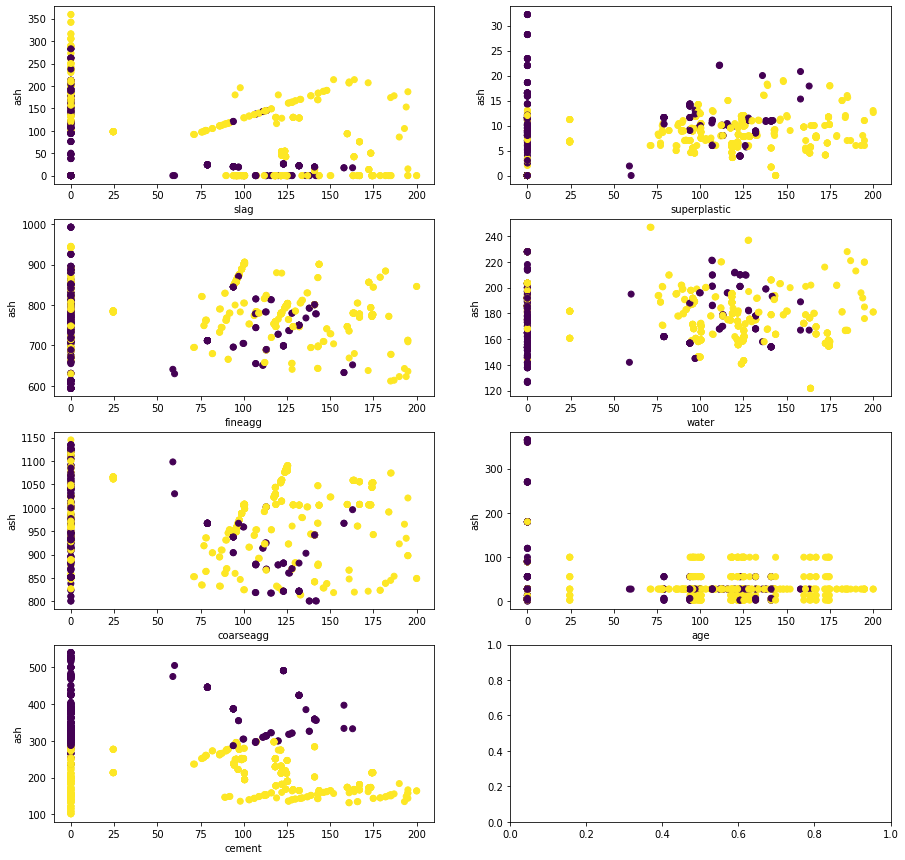

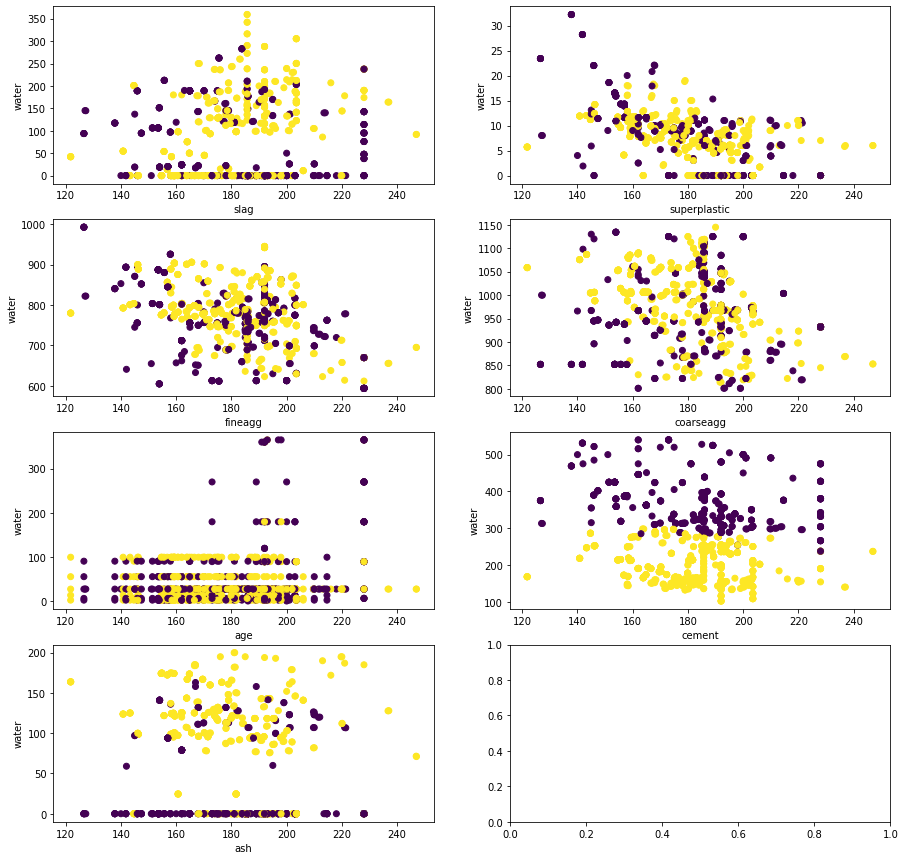

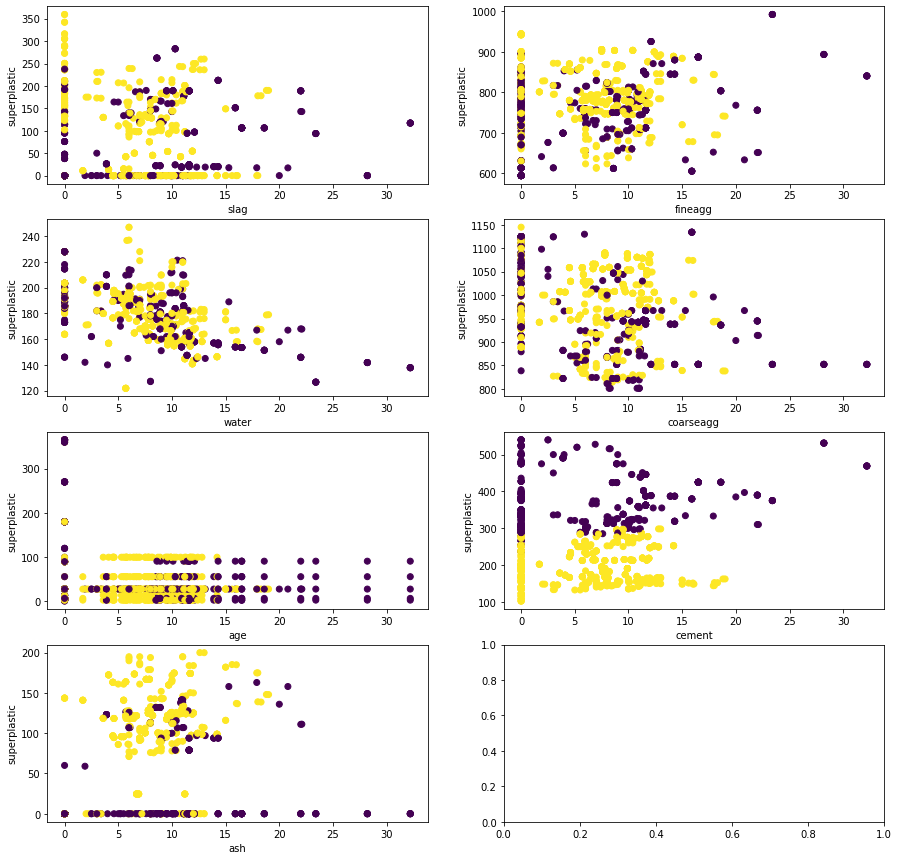

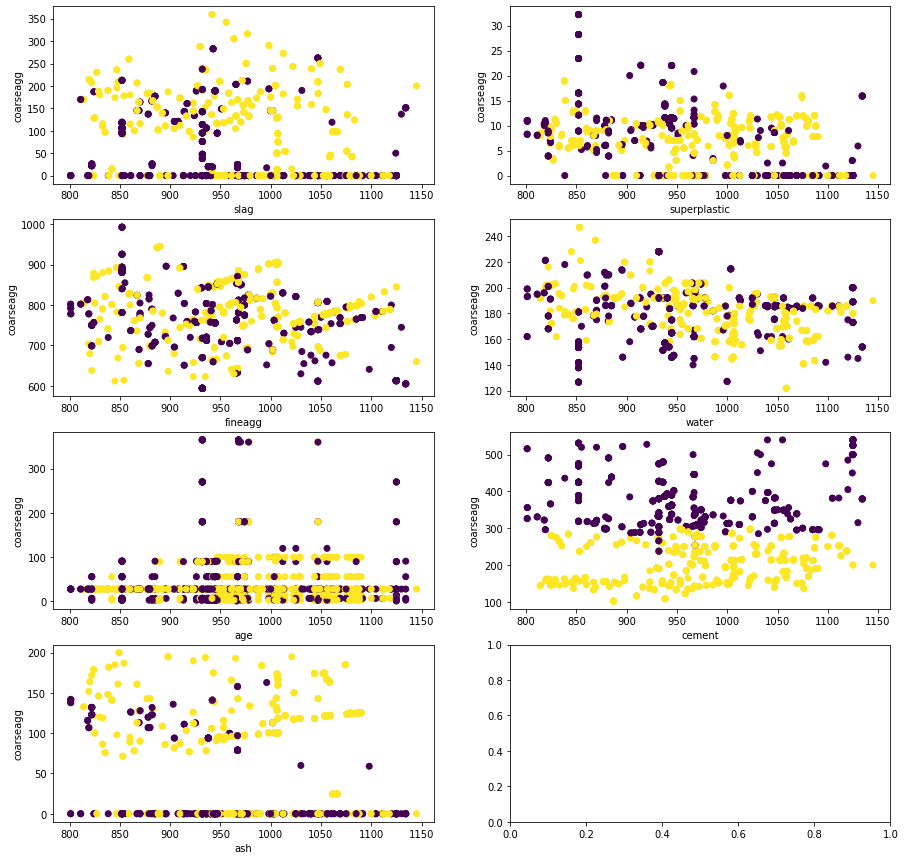

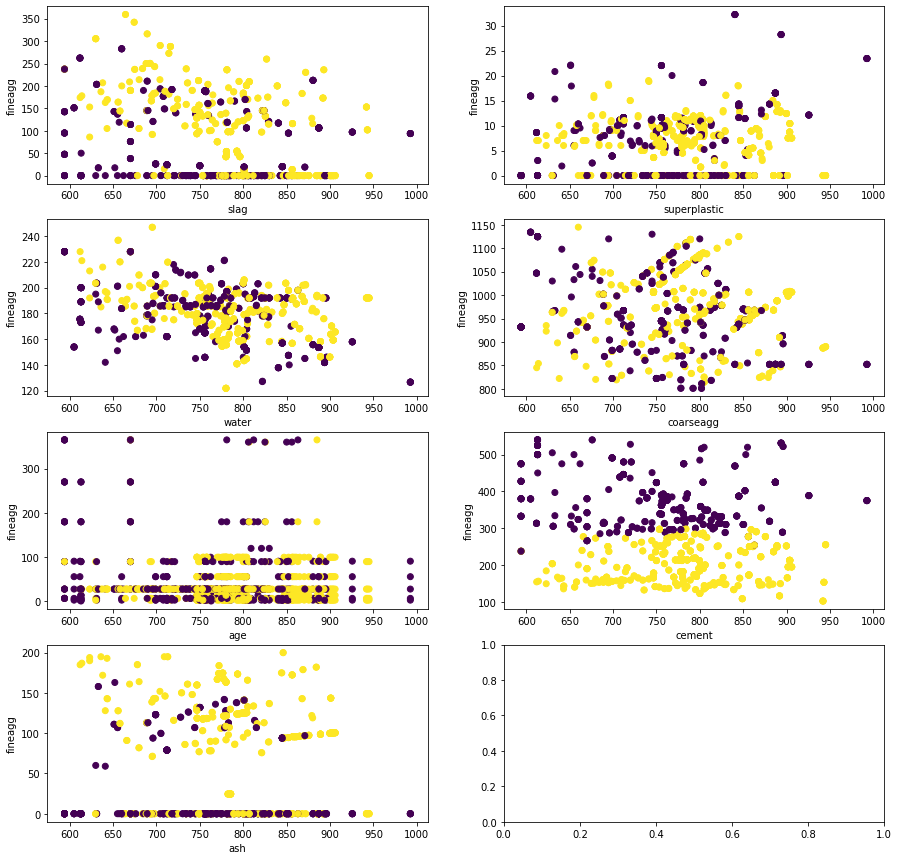

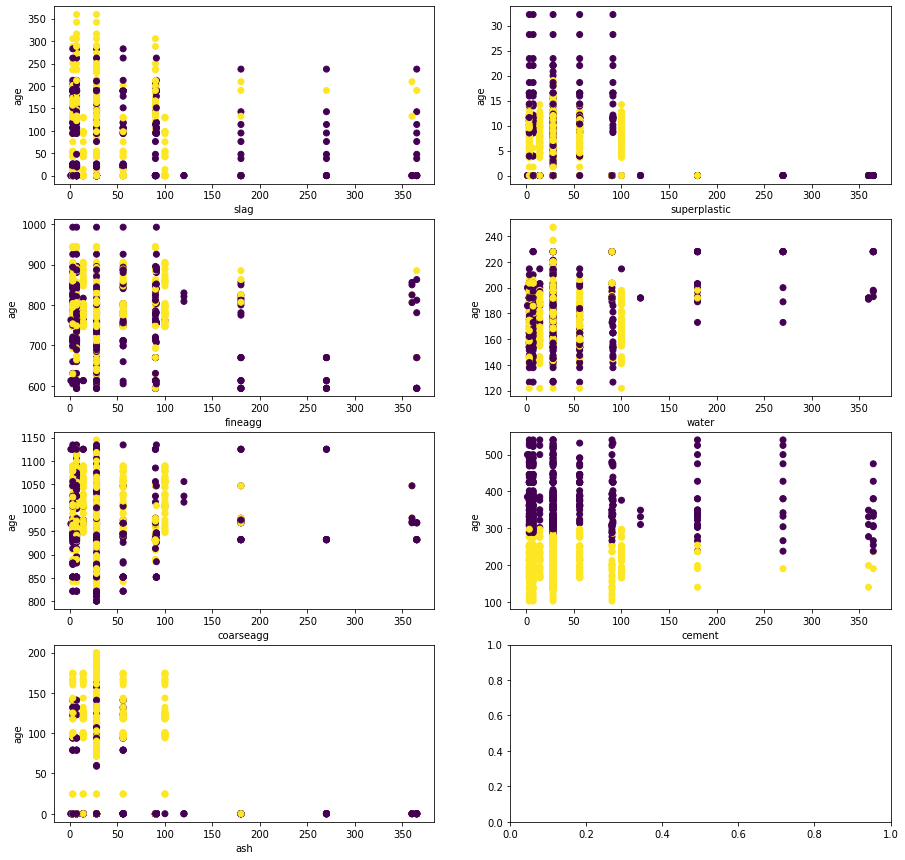

In [46]:
for col in x.columns:
    kmeansplot(x,col,labels)